# Topic : Graduate Admissions

### Here is the link to the problem:https://www.kaggle.com/mohansacharya/graduate-admissions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [3]:
filterwarnings(action="ignore")

In [4]:
%matplotlib inline

In [5]:
df=pd.read_csv("Admission_Predict.csv")

In [6]:
df.shape

(400, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Droping Serial No. as it will not give any meaningful information.

In [9]:
df.drop("Serial No.",inplace=True,axis=1)

In [10]:
df.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [11]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


## Some insights of data:

In [12]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### observations:
1.Students having equal to or greater than 75% of GRE Score and TOEFL Score have 83% chances of getting admission.

2.Students having research experience are more likely to get admitted.

3.Mean GRE Score and TOEFL Score is 316 and 107 respectively.

In [13]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Our data is free from missing values

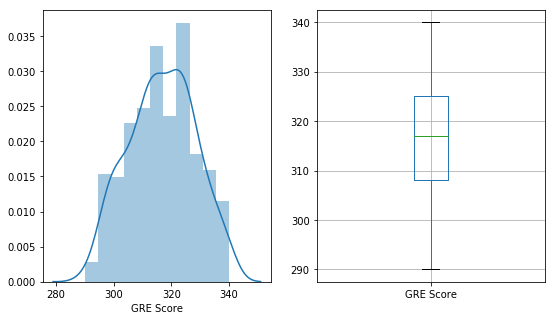

In [14]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
sns.distplot(df["GRE Score"])
plt.subplot(1,2,2)
df.boxplot("GRE Score")

### Observation:
Maximum GRE Score is 340

minimum is 290. 

mean of the GRE Score is 316

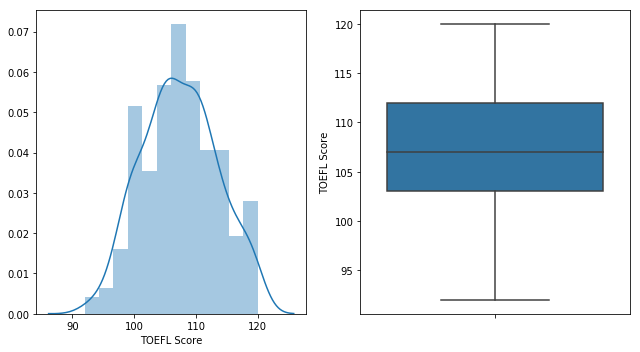

In [15]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
sns.distplot(df["TOEFL Score"])
plt.subplot(1,2,2)
sns.boxplot(y=df["TOEFL Score"])

plt.tight_layout()

### Observation:
Maximum TOEFL Score is 120

Minimum TOEFL Score is 92

Mean TOEFL Score is 107

In [16]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [17]:
df["University Rating"].unique()

array([4, 3, 2, 5, 1], dtype=int64)

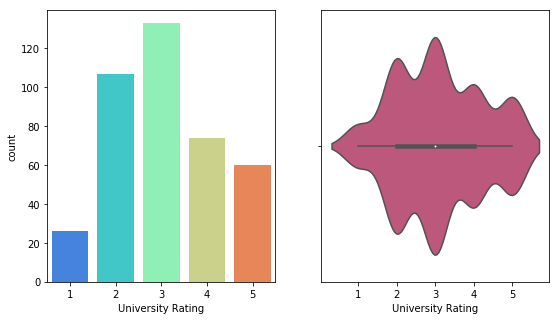

In [18]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
sns.countplot(df['University Rating'],palette="rainbow")
plt.subplot(1,2,2)
sns.violinplot(df["University Rating"],palette="plasma")

#### Maximum of the students completed their graduation from an university having rating 3.

In [19]:
df["University Rating"].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

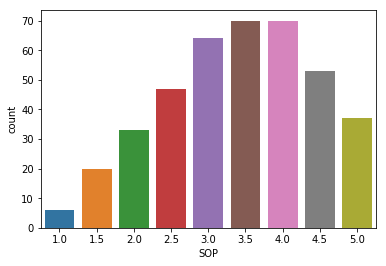

In [20]:
sns.countplot(df["SOP"])

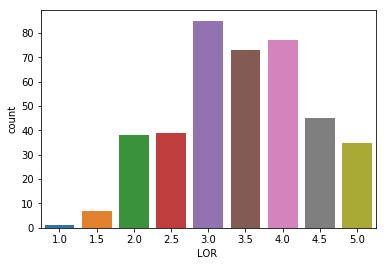

In [21]:
#df['LOR '].value_counts()
sns.countplot(df['LOR '])

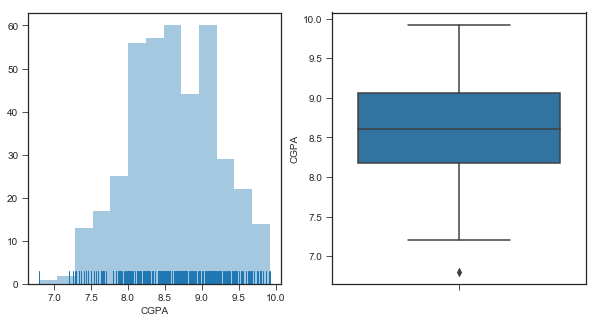

In [22]:
plt.figure(figsize=(10,5))
sns.set_style("ticks")
plt.subplot(1,2,1)
sns.distplot(df["CGPA"],kde=False,rug=True)
plt.subplot(1,2,2)
sns.boxplot(y=df["CGPA"])

### Mean CGPA obtained is 8.6.

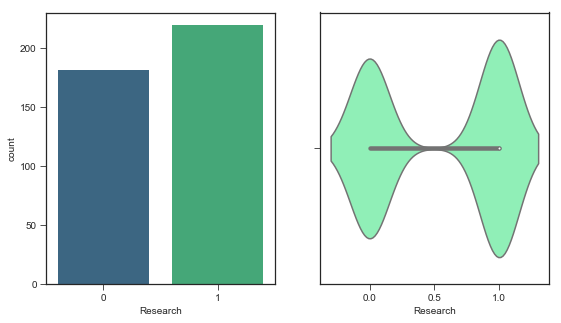

In [23]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
sns.countplot(df["Research"],palette="viridis")
plt.subplot(1,2,2)
sns.violinplot(df["Research"],palette="rainbow")

#### Most of the students have research experience.

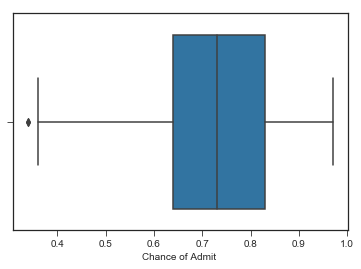

In [24]:
sns.boxplot(df['Chance of Admit '])

#### Mean chance of admit is 72%.

## BIVARIATE ANALYSIS:=>

In [25]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

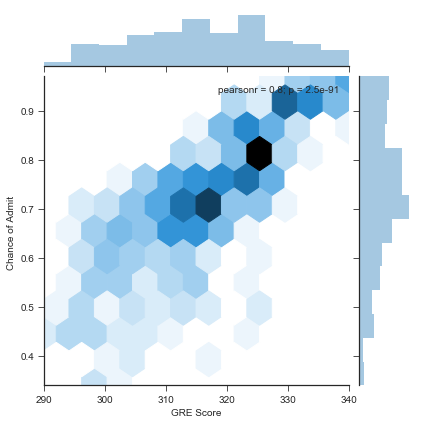

In [26]:
sns.jointplot(x=df["GRE Score"],y=df["Chance of Admit "],kind="hex")

#### Students having good GRE Score, have more chances of getting admission. Pearson's R is 0.8 thus, two have moderate positive correlation. 

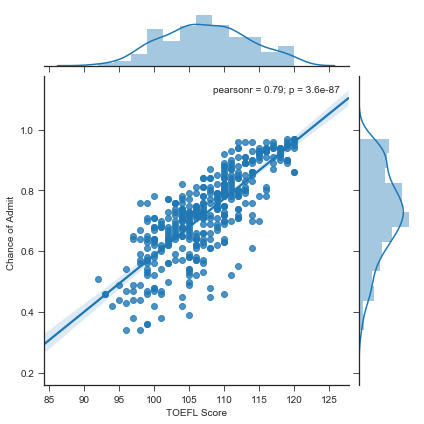

In [27]:
sns.jointplot(x=df["TOEFL Score"],y=df["Chance of Admit "],kind="reg")

#### Students having greater the TOEFL Score, have more chances of admission.

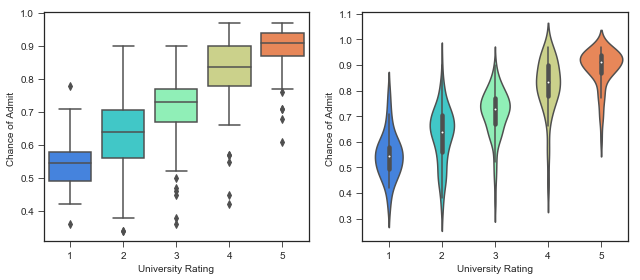

In [28]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.set_style("ticks")
sns.boxplot(x=df['University Rating'],y=df['Chance of Admit '],palette="rainbow")
plt.subplot(1,2,2)
sns.violinplot(x=df['University Rating'],y=df['Chance of Admit '],palette="rainbow")

plt.tight_layout()

In [29]:
df[df["University Rating"]==1]["Chance of Admit "].max()

0.78

In [30]:
df[df["University Rating"]==5]["Chance of Admit "].max()

0.97

#### Students who belongs from university having rating 4 or 5 have 97% of chances of getting admission.

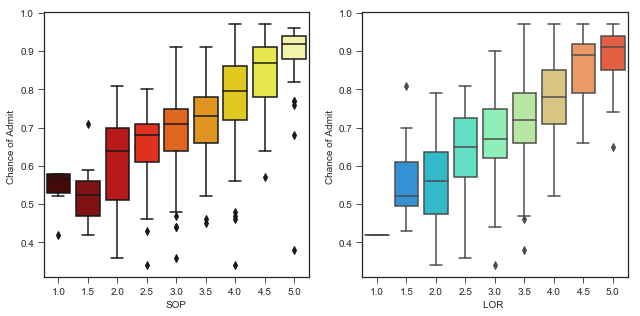

In [31]:
plt.figure(figsize=(9,4.5))
plt.subplot(1,2,1)
sns.boxplot(x=df["SOP"],y=df["Chance of Admit "],palette="hot")
plt.subplot(1,2,2)
sns.boxplot(x=df["LOR "],y=df["Chance of Admit "],palette="rainbow")

plt.tight_layout()

#### Students having statement of purpose strength greater than or equal to 4, and Letter of recommendation strength greater than or equal to 3.5 are more likely to get admitted.

Text(0.5,1,'CGPA vs Chance of Admit')

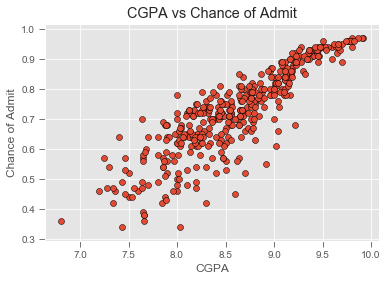

In [32]:
plt.style.use("ggplot")
plt.scatter(x=df["CGPA"],y=df["Chance of Admit "],edgecolors="black")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.title("CGPA vs Chance of Admit")

#### Greater the CGPA of a student, greater will be his/her chances of getting admission. 

#### Both columns are moderately positvely correlated.

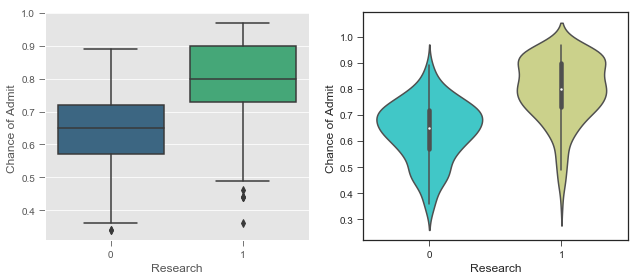

In [33]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.set_style("ticks")
sns.boxplot(x=df["Research"],y=df["Chance of Admit "],palette="viridis")
plt.subplot(1,2,2)
sns.violinplot(x=df["Research"],y=df["Chance of Admit "],palette="rainbow")

plt.tight_layout()

### Students having research experience are more likely to get admission.

## Multivariate Analysis:=>

In [34]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


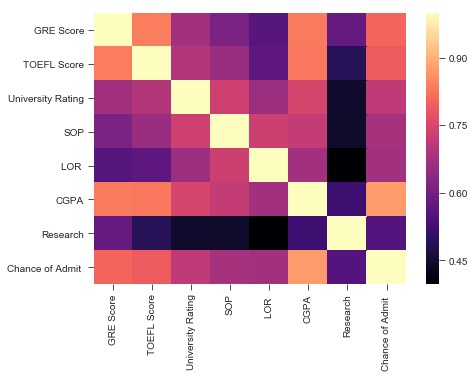

In [35]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap="magma")

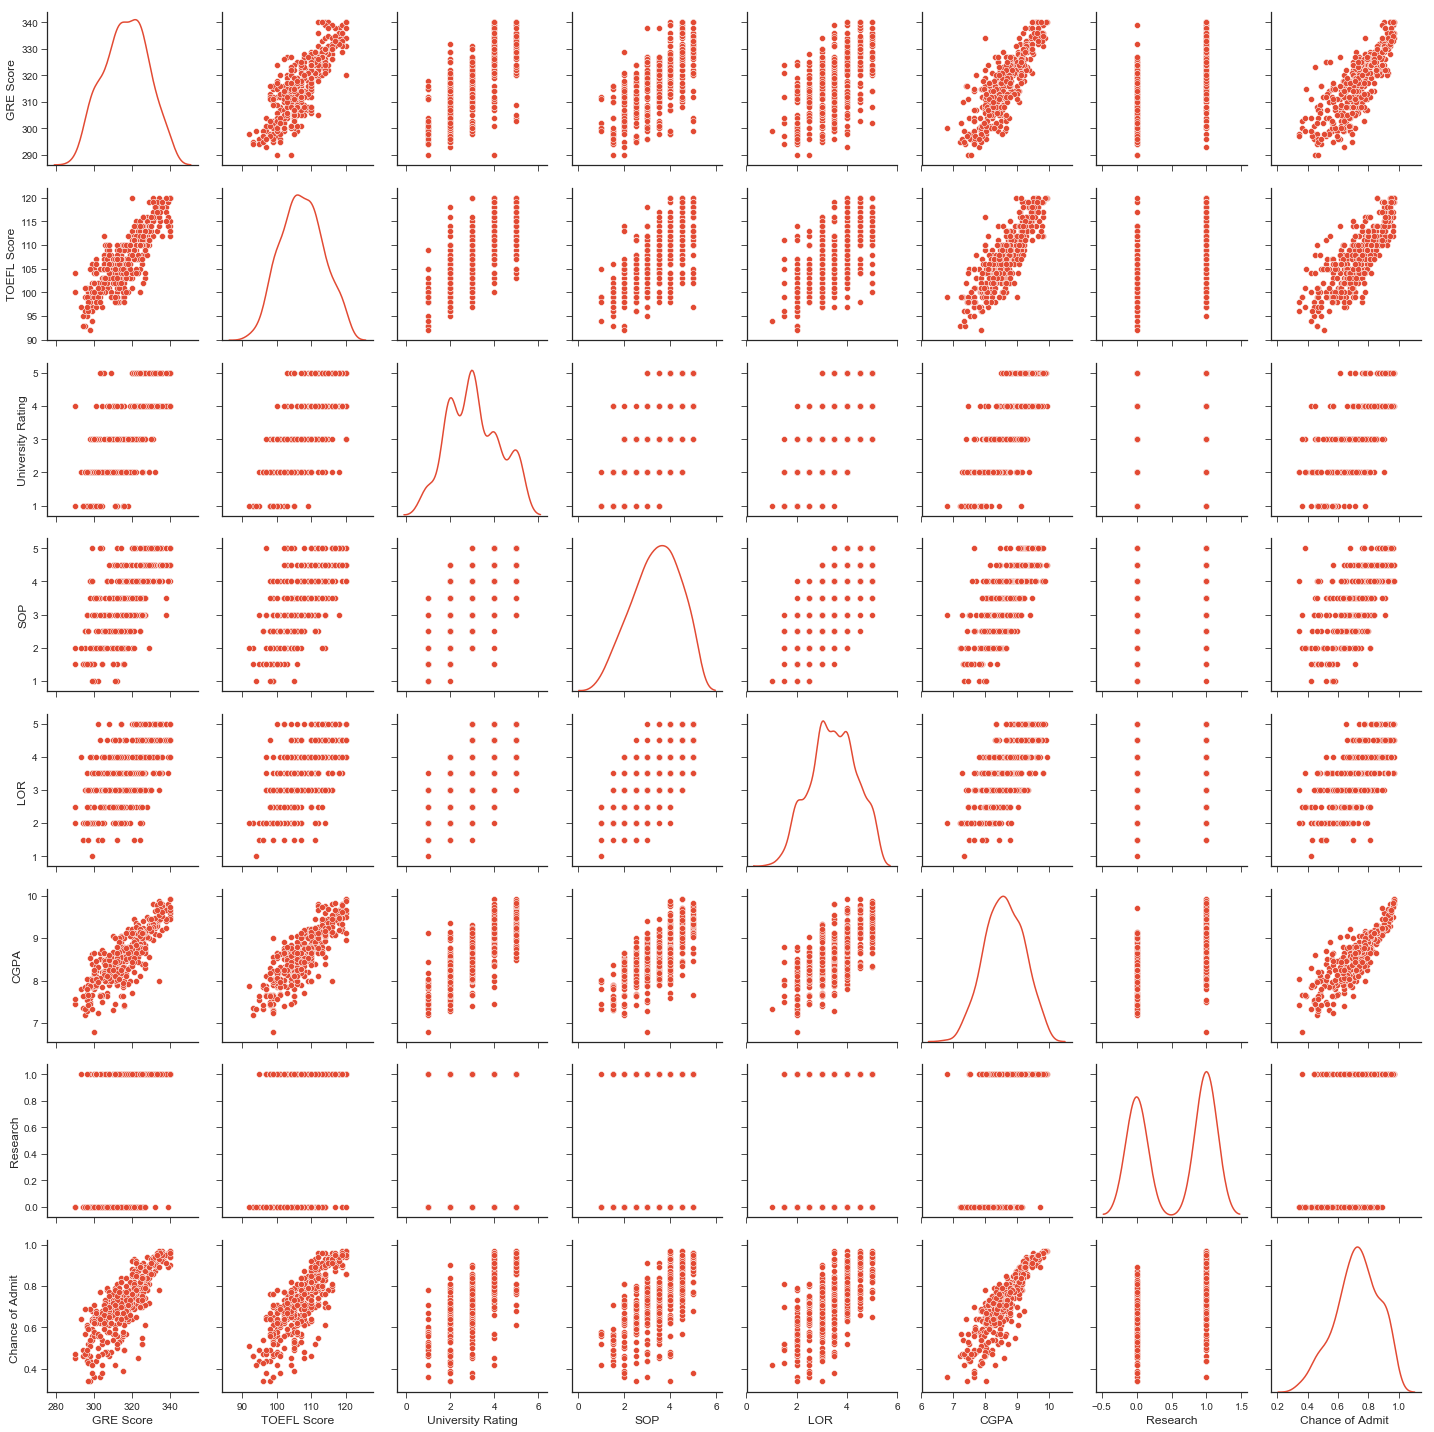

In [36]:
sns.pairplot(df,diag_kind="kde")

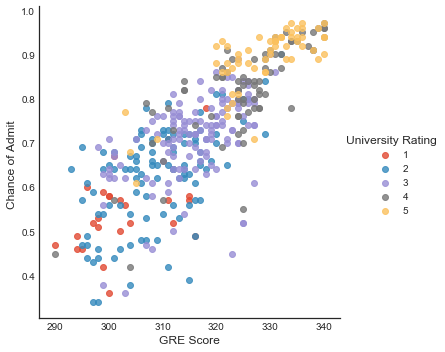

In [37]:
sns.set_style("white")
sns.lmplot(x="GRE Score",y="Chance of Admit ",data=df,hue="University Rating",fit_reg=False)

#### Student having good GRE Score and student who completed their graduation from university of rating 5 have more chances of getting admission.

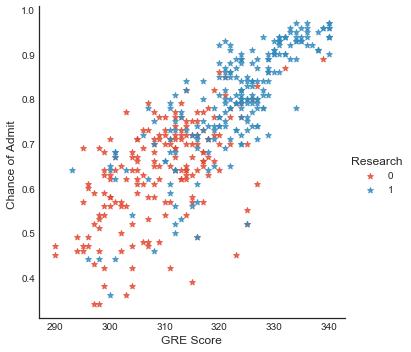

In [38]:
sns.lmplot(x="GRE Score",y="Chance of Admit ",data=df,hue="Research",fit_reg=False,markers='*')

#### Student having research experience and good GRE Score are more likely to get admission.

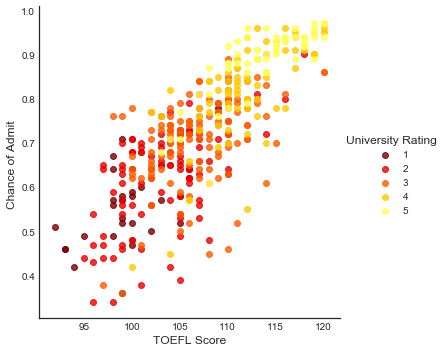

In [39]:
sns.lmplot(x="TOEFL Score",y="Chance of Admit ",data=df,hue="University Rating",fit_reg=False,palette="hot")

#### Student having good TOEFL Score and student who completed their graduation from university of rating 5 have more chances of getting admission.

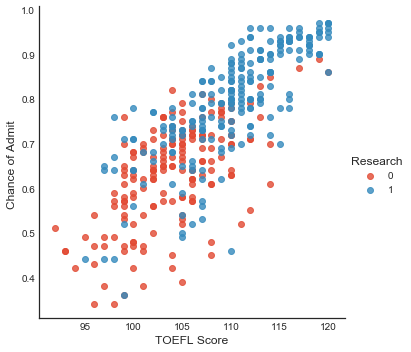

In [40]:
sns.lmplot(x="TOEFL Score",y="Chance of Admit ",data=df,hue="Research",fit_reg=False)

#### Student having research experience and good TOEFL Score are more likely to get admission.

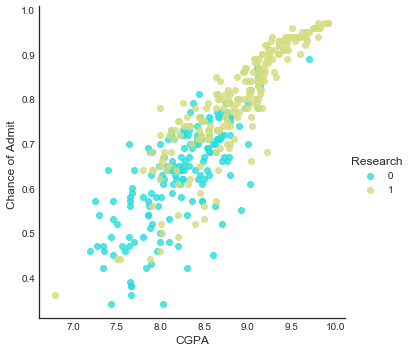

In [41]:
sns.lmplot(x="CGPA",y="Chance of Admit ",data=df,hue="Research",fit_reg=False,palette="rainbow")

#### Student having research experience and good CGPA are more likely to get admission.

# It's all about Analysis and Visualization.

# Thank you!